In [67]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pre
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import graphviz 

# _Part A_

# 1. Load and View my data

## 1.1 Load my Data Can You Predict Product Backorders?

In [22]:
df = pd.read_csv('C:\\Users\\LucyYang\\Juypter\\Kaggle_Training_Dataset_v2.csv')
df.head()

E:\_LastSemester\2018Spring\DataScience\Tool\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## 1.2 View basic info

In [23]:
df.shape

(1687861, 23)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

## 1.3 View categorical variables

In [25]:
df.deck_risk.value_counts()
df.oe_constraint.value_counts()
df.ppap_risk.value_counts()
df.stop_auto_buy.value_counts()
df.rev_stop.value_counts()
df.went_on_backorder.value_counts()
df.potential_issue.value_counts()

No     1686953
Yes        907
Name: potential_issue, dtype: int64

# 2. Data Cleaning

## 2.1 Check missing value

delete a row with all values are NaN

In [26]:
df.drop(df.index[1687860], inplace = True)
df.isnull().sum()

sku                       0
national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

Check the proportion of missing value

Replace the missing value with mean

**a) deal with column 'lead_time' **

the 'lead_time' is a skew right distribution, so we replace the missing value with the mean value_(In practice, for skewed distributions the most commonly reported typical value is the mean)

In [27]:
df.lead_time.isnull().sum()/df.shape[0]

0.059775692296754473

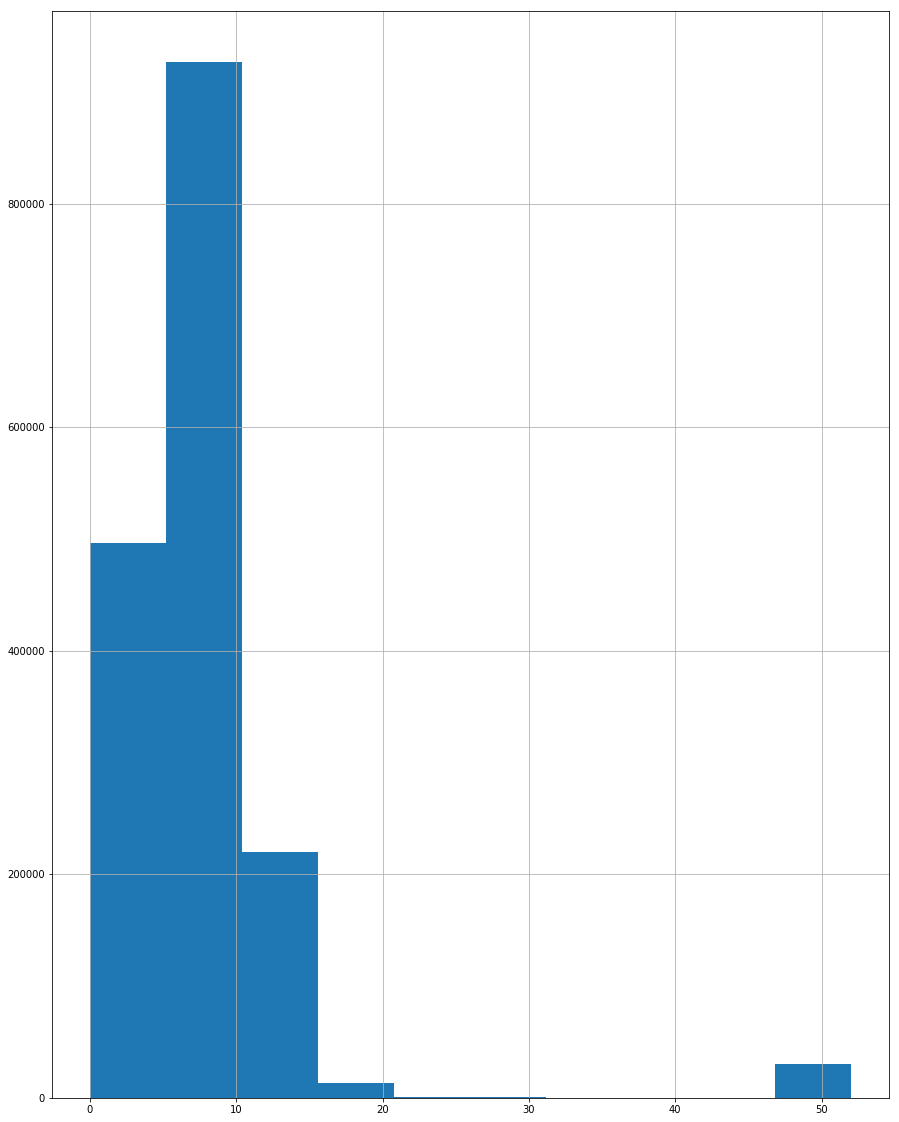

In [77]:
plt.show()
df.lead_time.hist(figsize = (15, 20))

In [29]:
df.lead_time.fillna(df.lead_time.mean(), inplace = True)

In [30]:
df.lead_time.isnull().sum()

0

**b) deal with column 'perf_6_month_avg' (for there missing value is -99)**

the 'perf_6_month_avg' is a skew left distribution, so we replace the missing value with the mean value_(In practice, for skewed distributions the most commonly reported typical value is the mean)

In [31]:
df.perf_6_month_avg.value_counts(dropna = False).values[2]/df.shape[0]

0.076711338618131841

In [32]:
df.perf_6_month_avg.replace(-99.00, np.nan, inplace = True)

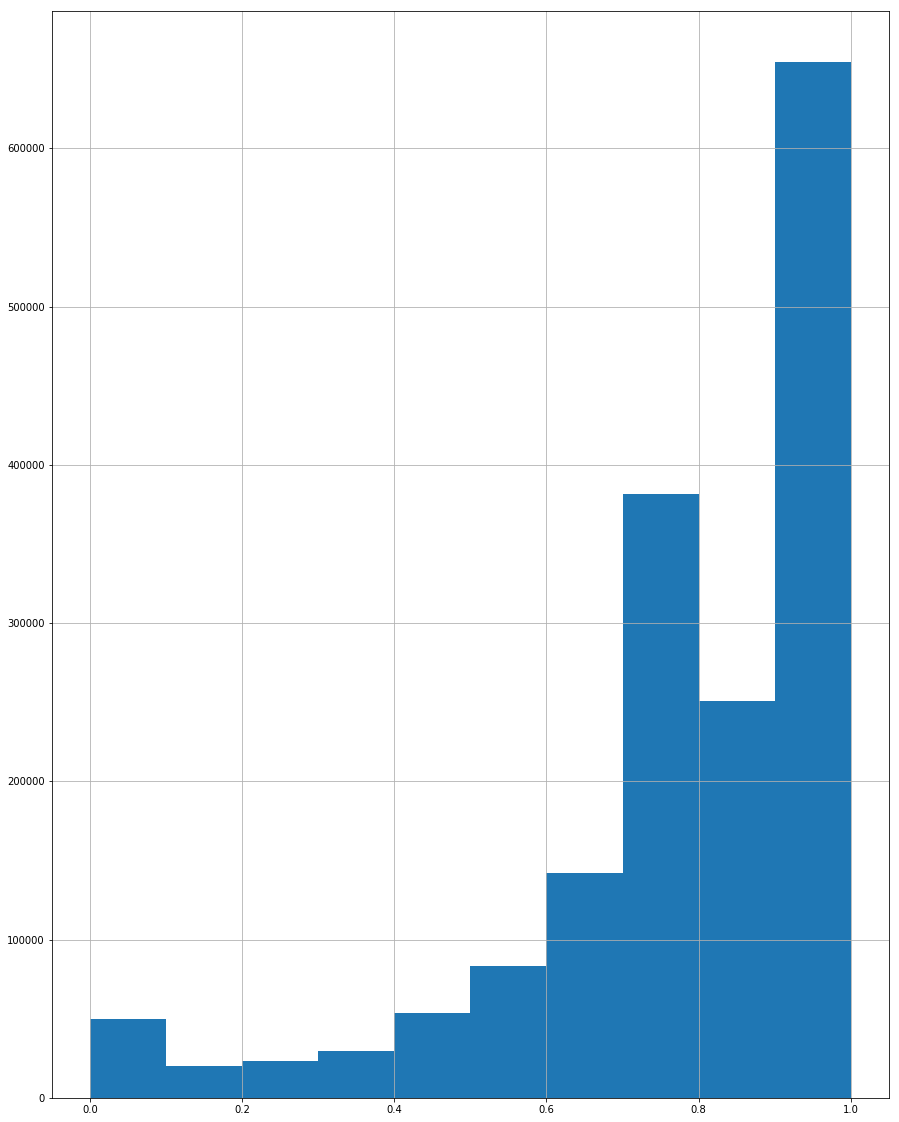

In [79]:
plt.show()
df.perf_6_month_avg.hist(figsize = (15, 20))

In [34]:
df.perf_6_month_avg.fillna(df.perf_6_month_avg.mean(), inplace = True)
df.perf_6_month_avg.isnull().sum()

0

**c) deal with column 'perf_12_month_avg' (for there missing value is -99)**

the 'perf_12_month_avg' is a skew left distribution, so we replace the missing value with the mean value_(In practice, for skewed distributions the most commonly reported typical value is the mean)

In [35]:
df.perf_12_month_avg.value_counts(dropna = False).values[2]/df.shape[0]

0.069710758001256035

In [36]:
df.perf_12_month_avg.replace(-99.00, np.nan, inplace = True)

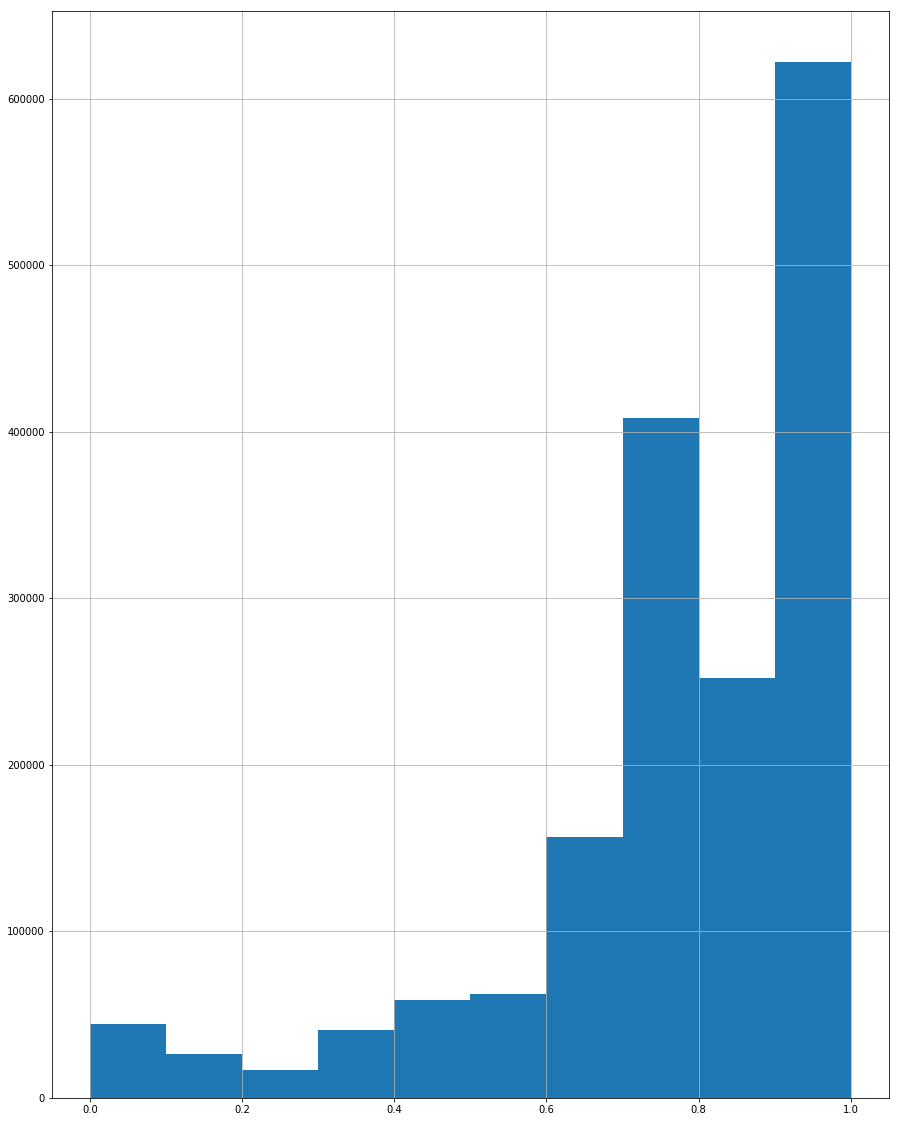

In [81]:
plt.show()
df.perf_12_month_avg.hist(figsize = (15, 20))

In [38]:
df.perf_12_month_avg.fillna(df.perf_12_month_avg.mean(), inplace = True)
df.perf_12_month_avg.isnull().sum()

0

## 2.1 Check inappropraite value

check data type of each column

In [39]:
df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

check each column whether they have inappropraite value

In [40]:
df.national_inv.value_counts(dropna = False)
df.in_transit_qty.loc[df['in_transit_qty'] < 0]
df.forecast_3_month.loc[df['forecast_3_month'] < 0]
df.forecast_6_month.loc[df['forecast_6_month'] < 0]
df.forecast_9_month.loc[df['forecast_9_month'] < 0]
df.sales_1_month.loc[df['sales_1_month'] < 0]
df.sales_3_month.loc[df['sales_3_month'] < 0]
df.sales_6_month.loc[df['sales_6_month'] < 0]
df.sales_9_month.loc[df['sales_9_month'] < 0]
df.min_bank.loc[df['min_bank'] < 0]
df.pieces_past_due.loc[df['pieces_past_due'] < 0]
df.local_bo_qty.loc[df['local_bo_qty'] < 0]

Series([], Name: local_bo_qty, dtype: float64)

# 3. Data distribution

## 3.1 Plot each column distribution

Qustion 3.1: How is  the data distribution?

Answer as follow:

a) **forecast_3_month is a skew right distribution. Most values are gathered in [0, 20000]** (the mean is greater than the median.)

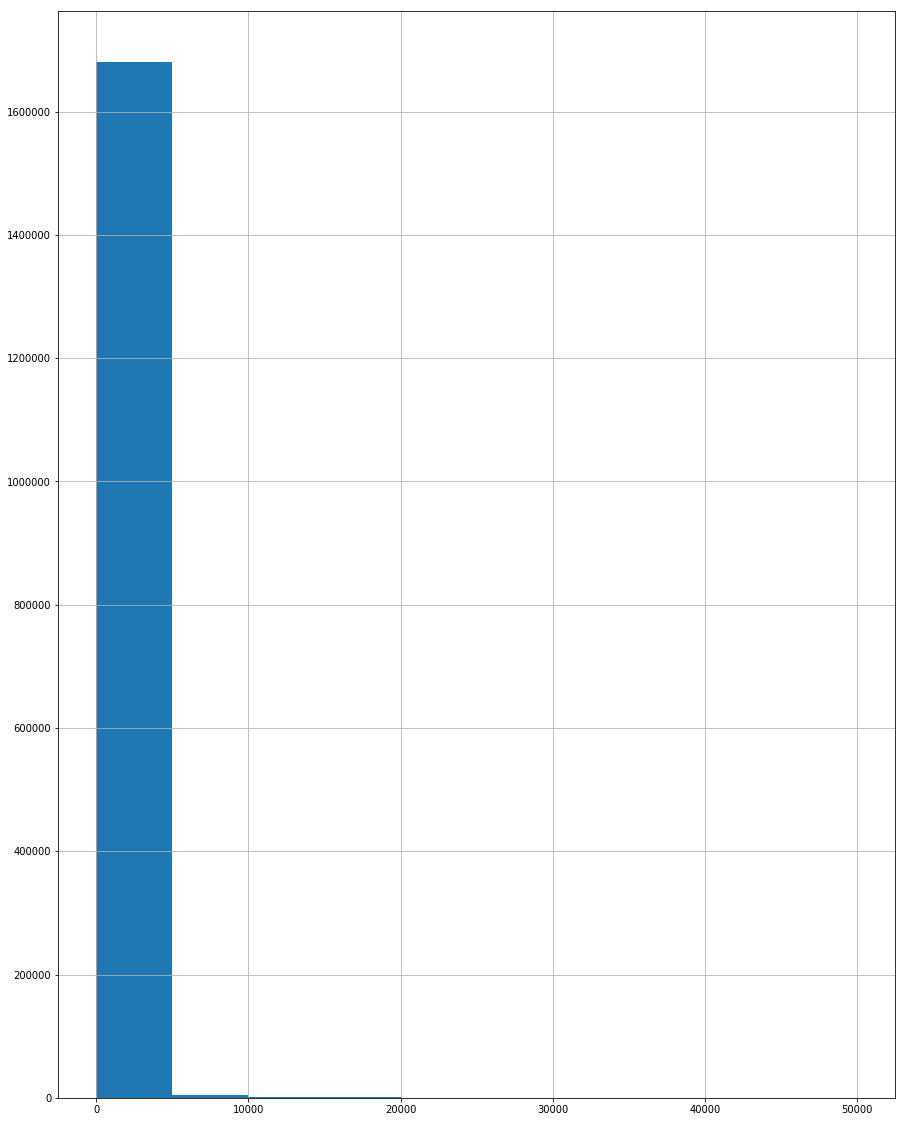

In [85]:
plt.show()
df.forecast_3_month.hist(figsize = (15, 20), range = [0, 50000])

b) **in_transit_qty is a skew right distribution. Most values are gathered in [0, 10000]** (the mean is greater than the median.)

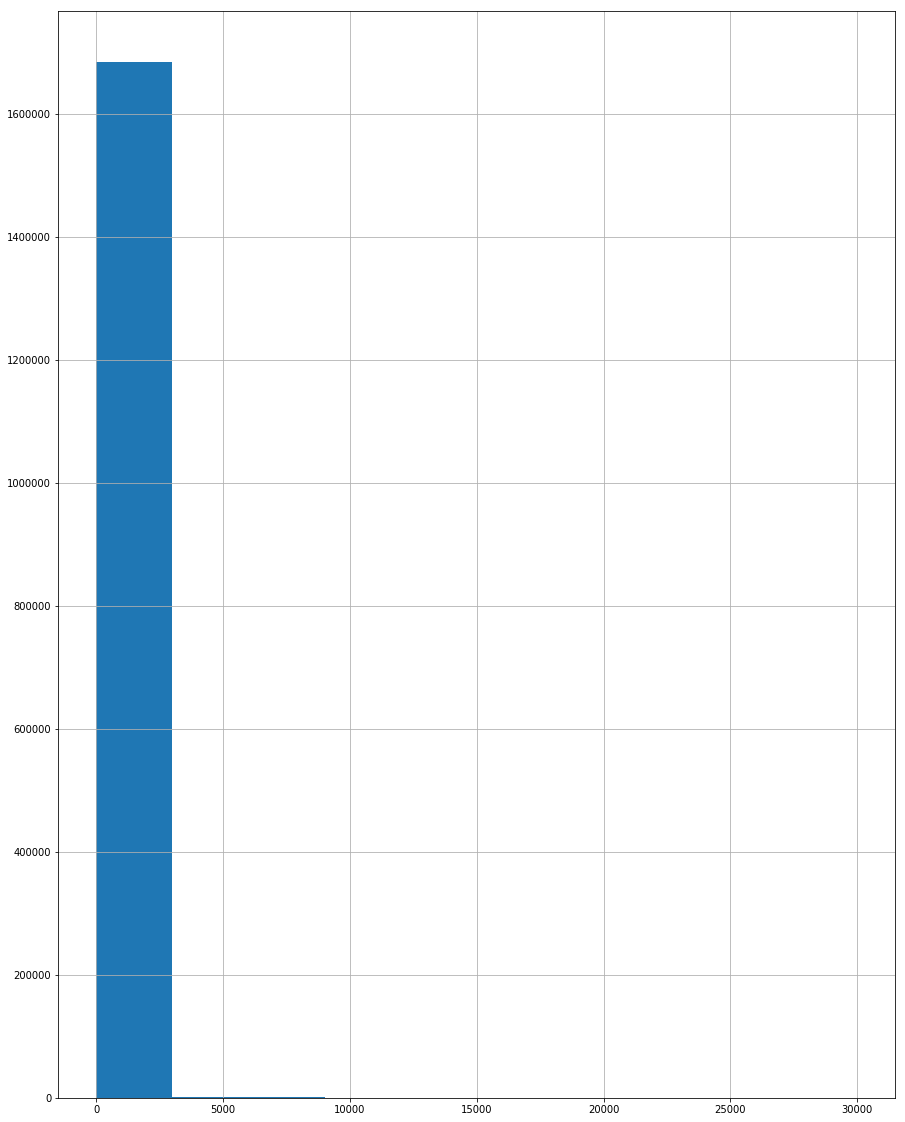

In [88]:
plt.show()
df.in_transit_qty.hist(figsize = (15, 20), range = [0, 30000])

c) **lead_time is a skew right distribution. Most values are gathered in [0, 60]** (the mean is greater than the median.)

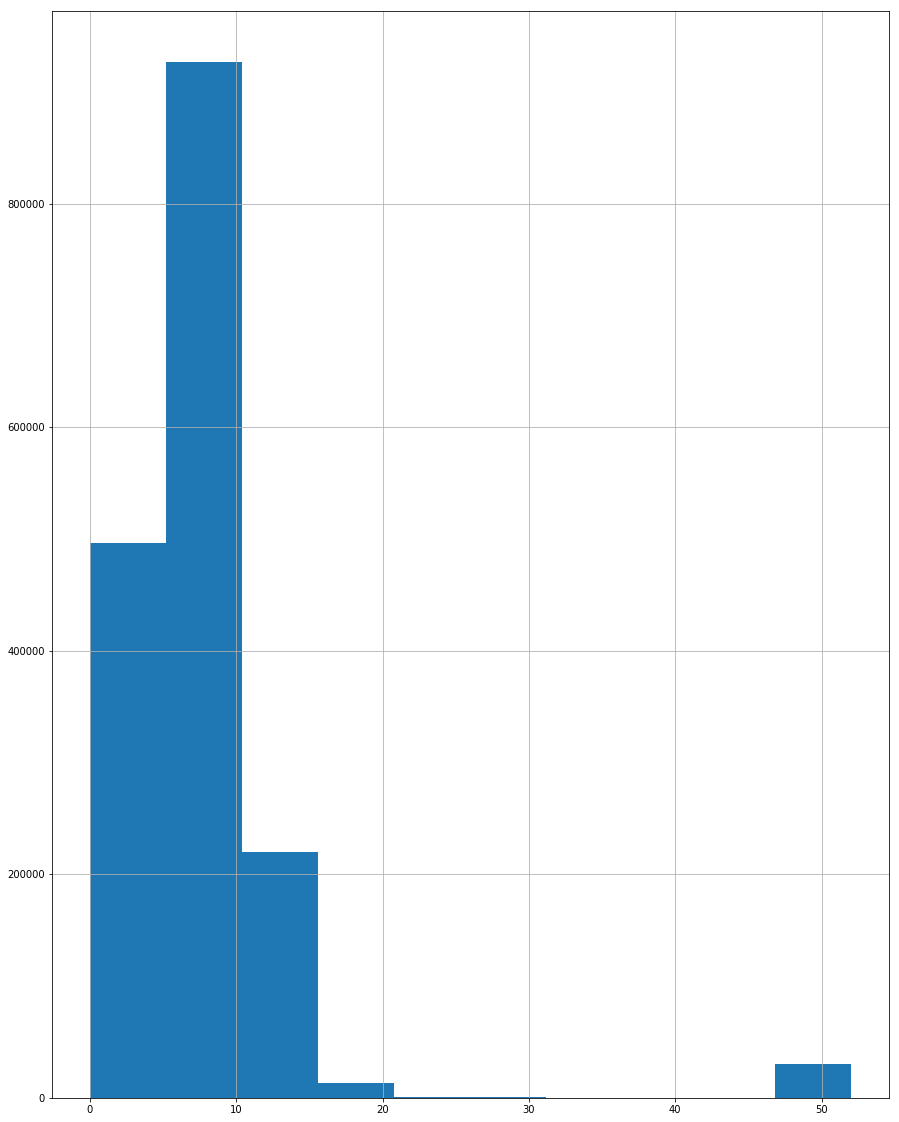

In [91]:
plt.show()
df.lead_time.hist(figsize = (15, 20))

d) **local_bo_qty is a skew right distribution. Most values are gathered in [0, 200]** (the mean is greater than the median.)

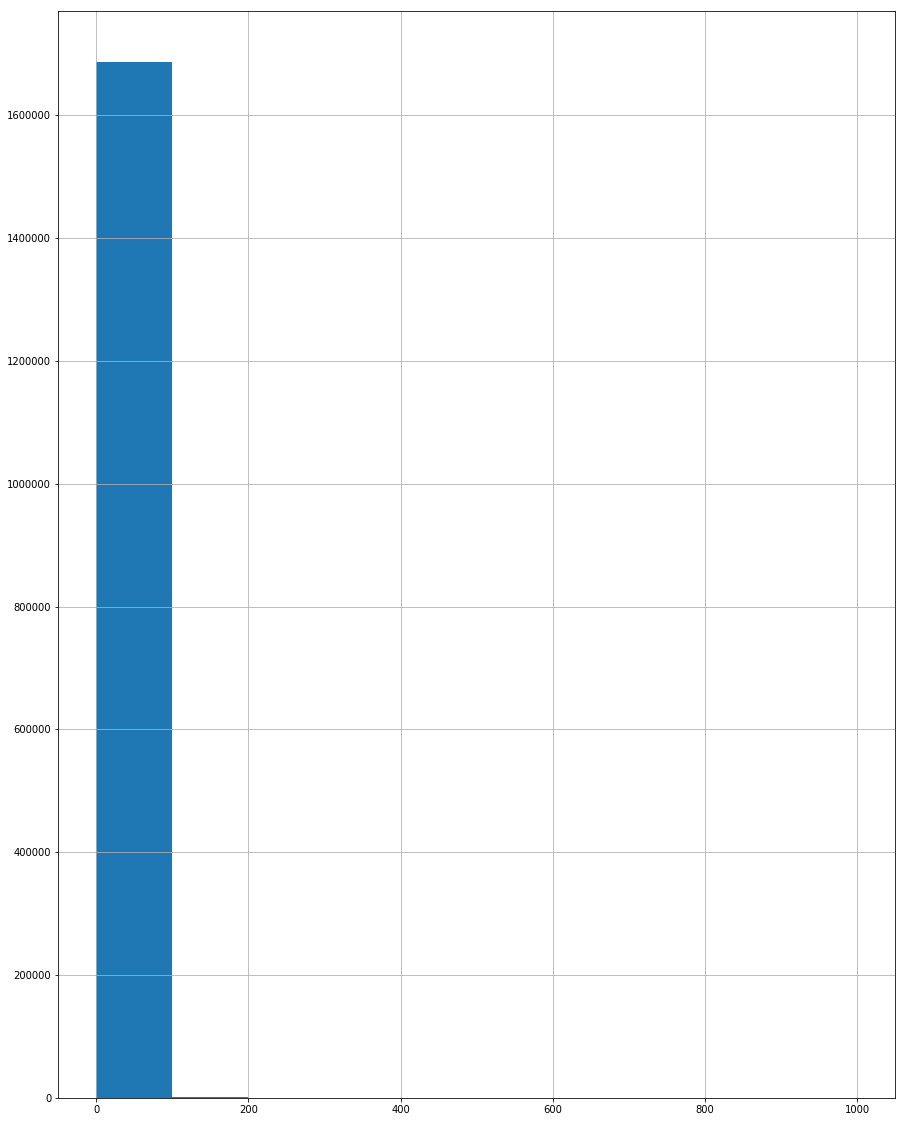

In [94]:
plt.show()
df.local_bo_qty.hist(figsize = (15, 20), range = [0, 1000])

e) **min_bank is a skew right distribution. Most values are gathered in [0, 3500]** (the mean is greater than the median.)

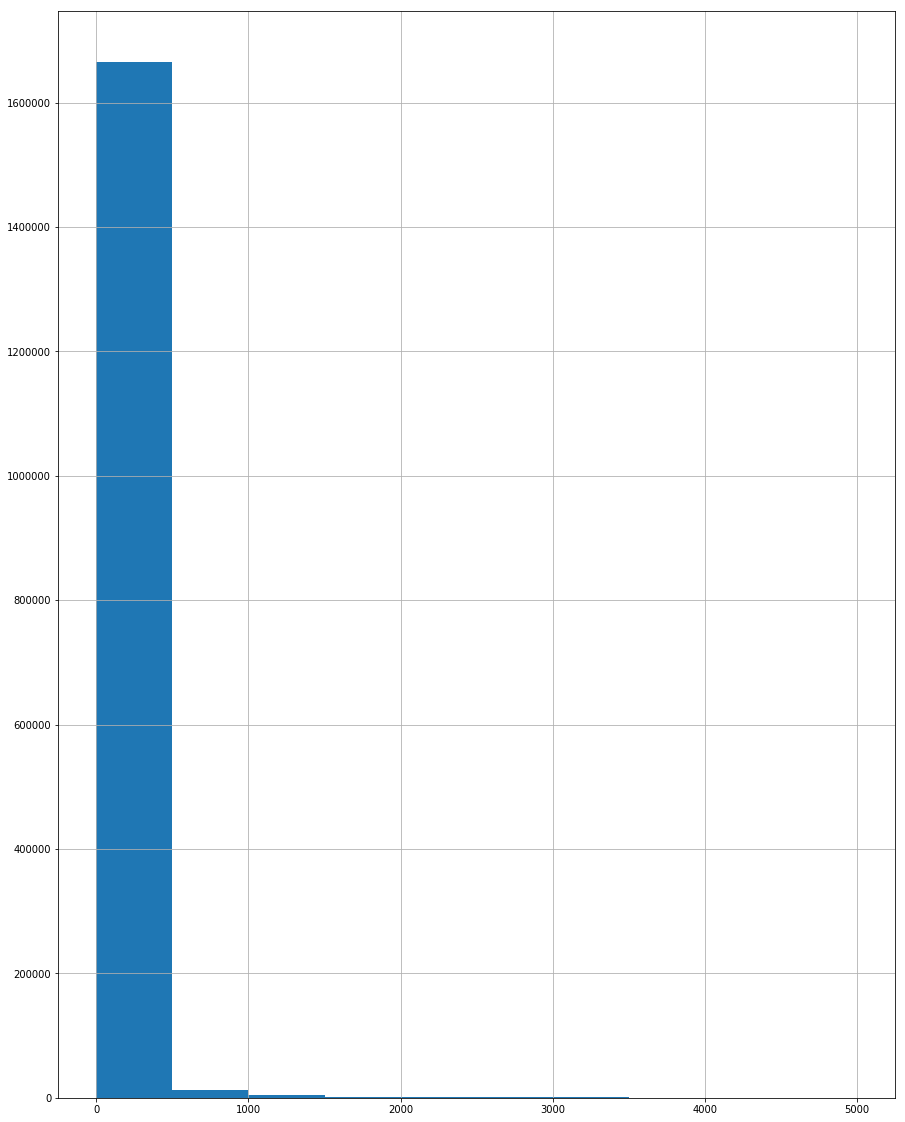

In [97]:
plt.show()
df.min_bank.hist(figsize = (15, 20), range = [0, 5000])

f) **national_inv is a skew right distribution. Most values are gathered in [0, 10000]** (the mean is greater than the median.)

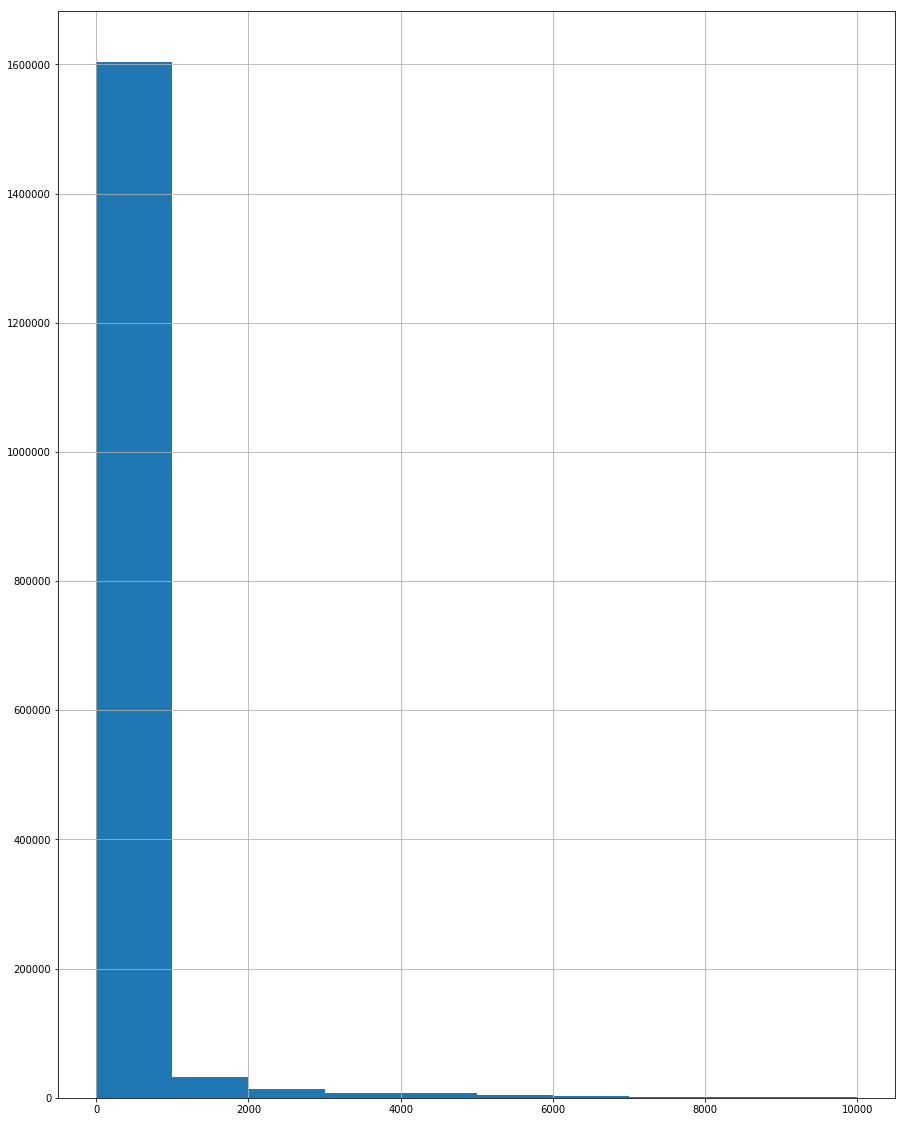

In [114]:
plt.show()
df.national_inv.hist(figsize = (15, 20), range = [0, 10000])

g) **perf_6_month_avg is a skew left distribution. The range is [0, 1]** (the mean is less than the median.)

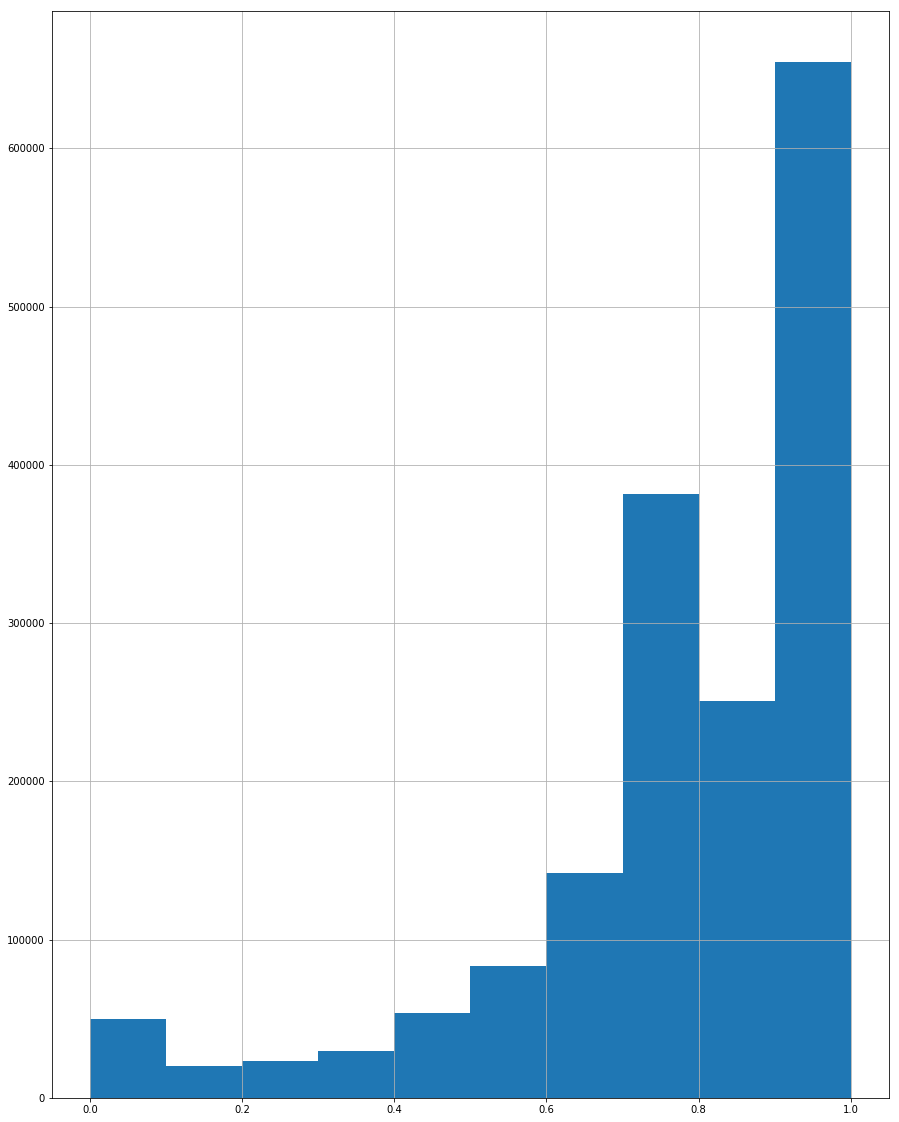

In [119]:
plt.show()
df.perf_6_month_avg.hist(figsize = (15, 20))

h) **pieces_past_due is a skew right distribution. Most values are gathered in [0, 400]** (the mean is greater than the median.)

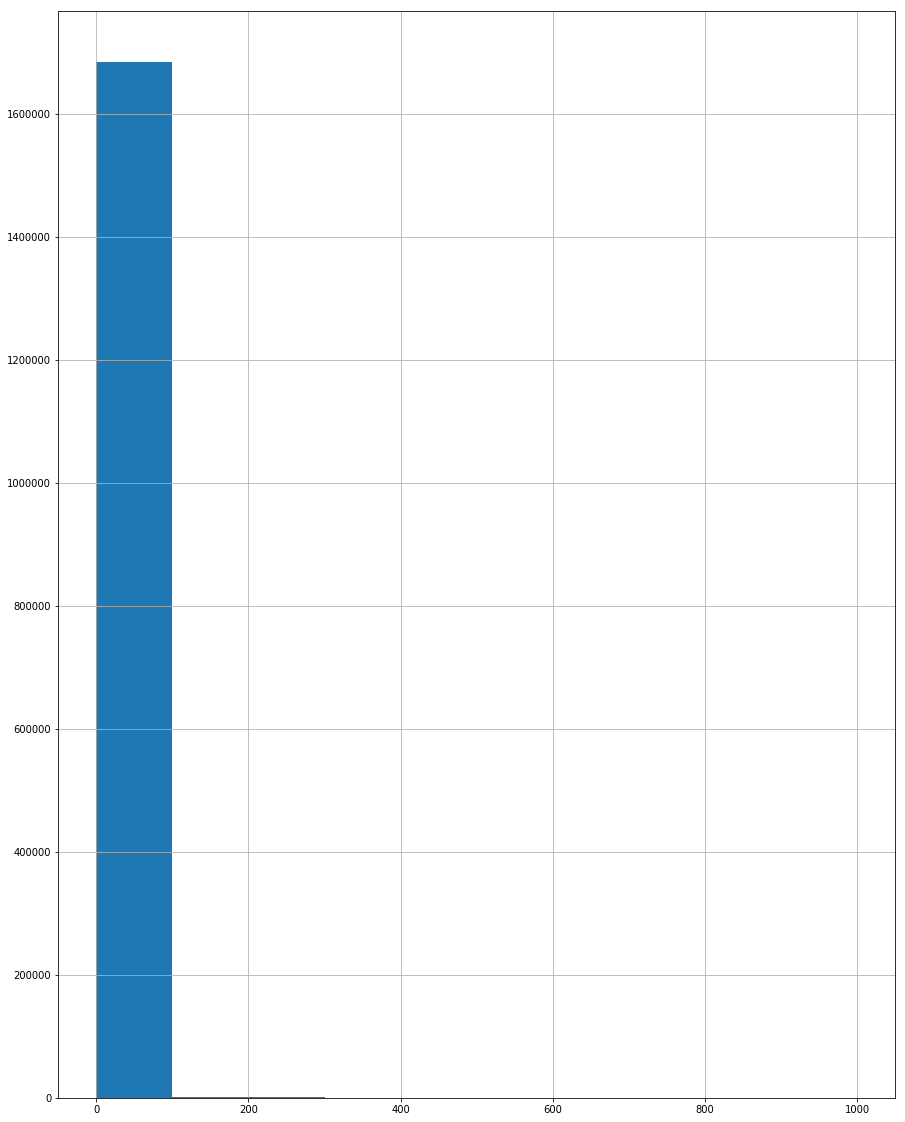

In [122]:
plt.show()
df.pieces_past_due.hist(figsize = (15, 20), range = [0, 1000])

i) **sales_1_month is a skew right distribution. Most values are gathered in [0, 2000]** (the mean is greater than the median.)

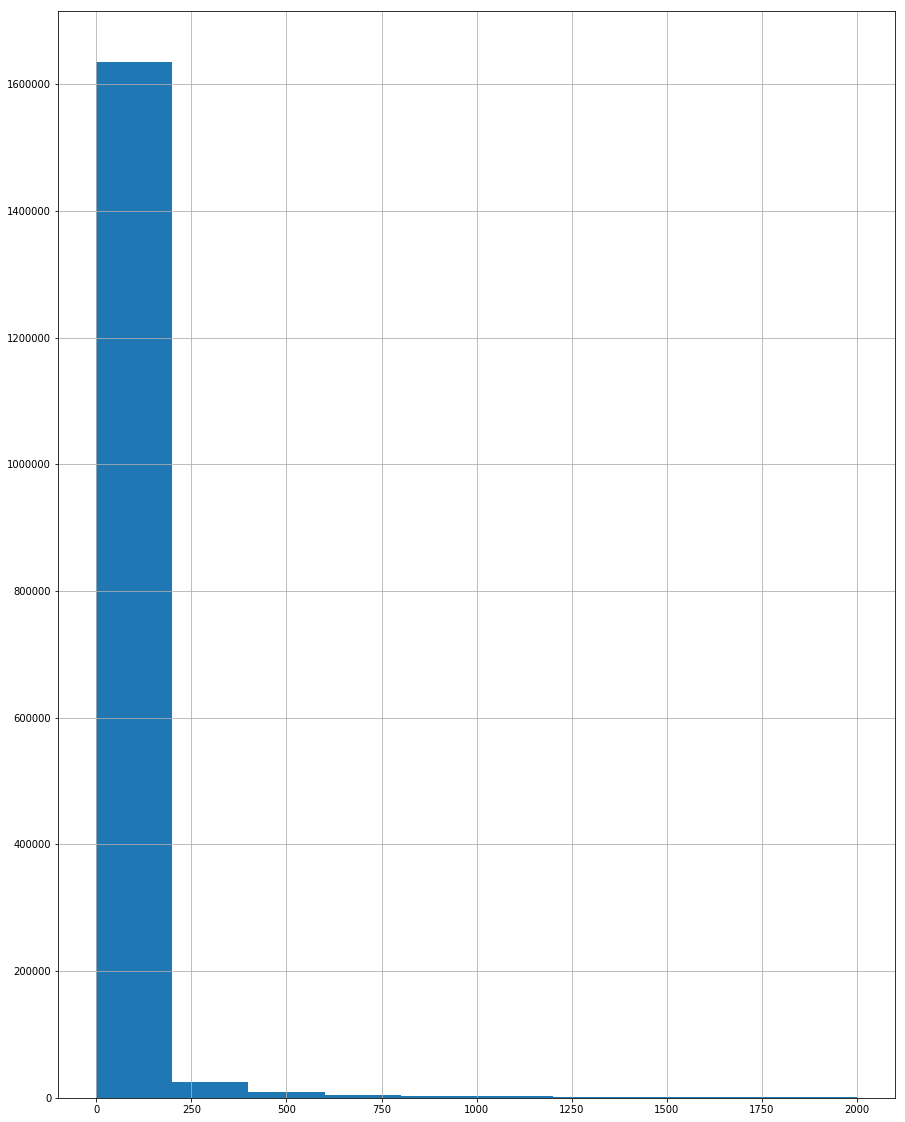

In [127]:
plt.show()
df.sales_1_month.hist(figsize = (15, 20), range = [0, 2000])

## 3.2 Summary Statistics

Question 3.2: What are the summary statistics?

Answer as follow:

In [50]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,7.823812e-01,7.769763e-01,6.264507e-01
std,2.961523e+04,6.841885e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.277419e-01,2.220005e-01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.300000e-01,7.200000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,8.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


## 3.3 Anomolies / Outliers

Question 3.3: Are there anomalies/outliers?

Answer as follow:

1. national_inv has most number of outliers and they are very discrete.
2. (forecast_3_month, forecast_6_month, forecast_9_month), (sales_3_month, sales_6_month, sales_9_month) are two group which outliers are distributed more and more discrete.
3. in_transit_qty, min_bank, pieces_past_due have a few number of outliers
4. leadtime, perf_6_month_avg, perf_12_month_avg, local_bo_qty are gathered.

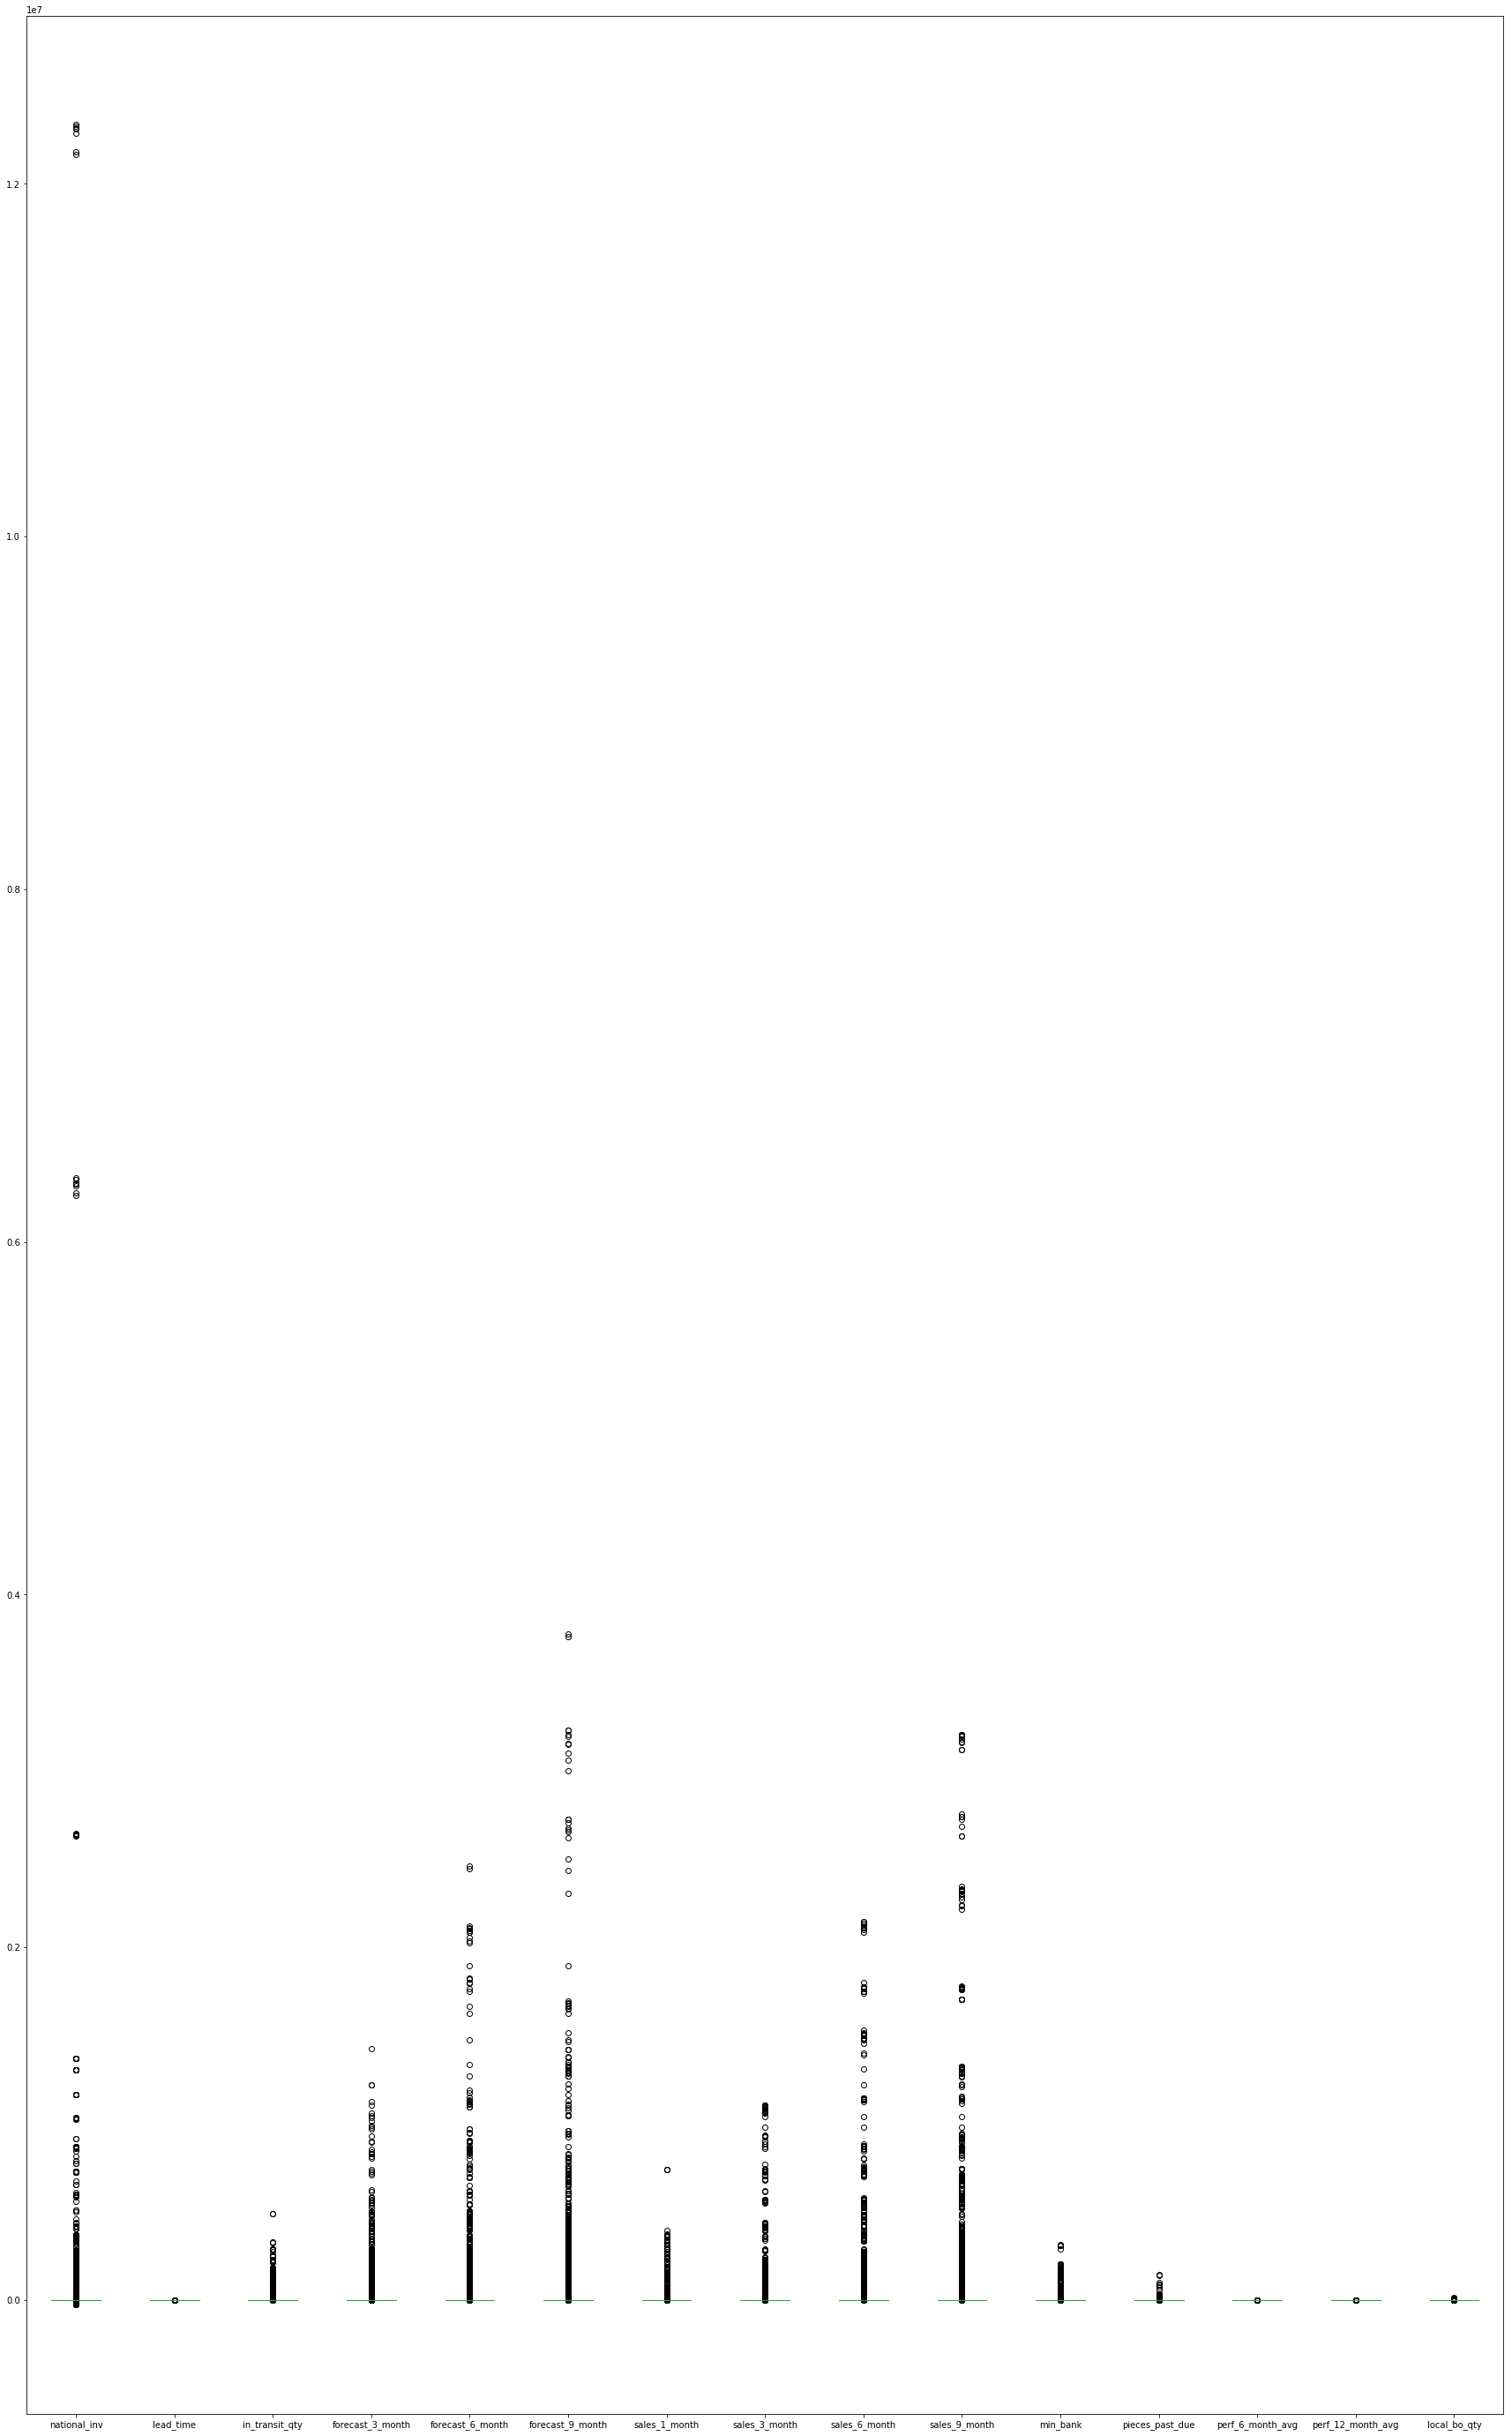

In [52]:
plt.show()
df.plot(kind='box', figsize=(30, 50))

# 4. Plot each clolumn

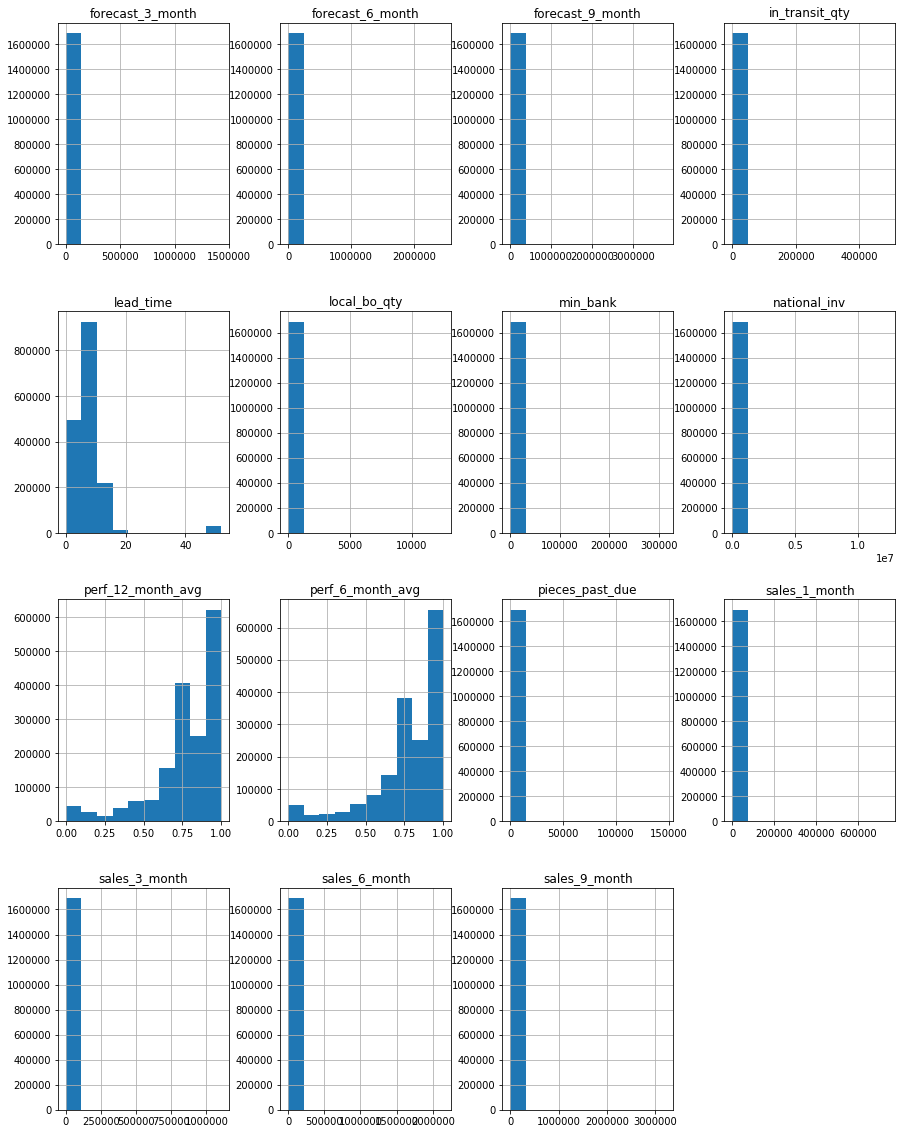

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000239837CB6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023983F23748>]], dtype=object)

In [129]:
plt.show()
df.hist(figsize = (15, 20))

Summary about the plot

1. Most columns have a very clusterd and representative range.
2. Lead time, perf_6_month_avg, perf_12_month_avg cannot find a typical value to represent these columns

# 5. Columns Correlated

Are any of the columns correlated? 

These 3 group are correlated columns:
1. forecast_3_month, forecast_6_month, forecast_9_month
2. sales_3_month, sales_6_month, sales_9_month
3. perf_6_month_avg, perf_12_month_avg

In [55]:
df.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003318,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,0.002869,0.002037,0.014887
lead_time,0.003318,1.000000,-0.006844,-0.008008,-0.008511,-0.008736,-0.005609,-0.006758,-0.007097,-0.007239,-0.007088,-0.001500,-0.009766,-0.007482,-0.001255
in_transit_qty,0.098238,-0.006844,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.004570,0.001611,0.066612
forecast_3_month,0.078199,-0.008008,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.006739,0.003357,0.039419
forecast_6_month,0.079744,-0.008511,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.007503,0.003717,0.039724
forecast_9_month,0.078948,-0.008736,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.007786,0.003768,0.039732
sales_1_month,0.147449,-0.005609,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.006323,0.002058,0.066188
sales_3_month,0.192605,-0.006758,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.006938,0.002091,0.071030
sales_6_month,0.225067,-0.007097,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.007104,0.001946,0.057765
sales_9_month,0.239613,-0.007239,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.007427,0.002363,0.048880


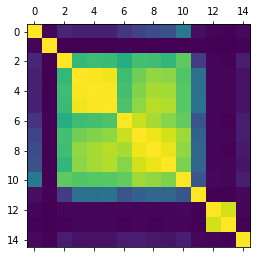

In [131]:
plt.show()
plt.matshow(df.corr())

# 6. Summary of EDA

1. Overall: 
1) This dataset is a very big dataset which have 1687861 rows and 23 columns. It means that I need build a large model for this dataset.
2) This dataset has many categorical variables which I need to convert it to numerical variables.
3) The target variable is categorical. So I should choose classification mode to analyse it.
2. Model recommendation:
1) decision tree
2) random forest
3. Data cleaning:
1) This dataset has some missing value: lead_time has NaN; perf_6_month_avg and perf_6_month_avg have -99 as missing value. I use mean to replace the missing value because they are skewed distribution which use mean as typical value.
2) This dataset doesn't have inapproprate values
4. Data distribution:
Most columns are skewd distribution but have a very clusterd and representative range.
1) national_inv has te most number of outliers and are most discrete.
2) (forecast_3_month, forecast_6_month, forecast_9_month), (sales_3_month, sales_6_month, sales_9_month) are two group which are more and more discrete.
3) in_transit_qty, min_bank, pieces_past_due have a few number of outliers and not very discrete.
4) leadtime, perf_6_month_avg, perf_12_month_avg, local_bo_qty are gathered.
5) Lead time, perf_6_month_avg, perf_12_month_avg cannot find a typical value to represent these columns
5. Column correlated: 
(forecast_3_month, forecast_6_month, forecast_9_month), (sales_3_month, sales_6_month sales_9_month), (perf_6_month_avg, perf_12_month_avg) are column correlated.

# _Part B_

# a. A clear description of the question being asked.

Can you predict product backorders?
In other words, can you predict backorder risk for products based on historical data? 

# b.  Background research of related work. 

1. What is a backorder?
Backorders are products that are temporarily out of stock, but will ship to customers when it is available. 
In other word, a backorder generally indicates that customer demand for a product or service exceeds a company's capacity to supply it.
2. Backorder is a big problem
1)	Huge number of sales orders and different suppliers where the out of stock items from increase complexity to the workload.
2)	Customers may not have the patience to wait for items. It may lead to lost sales and low customer satisfaction.
3. Way to handle it:
In order to monitor backorder, we can use machine learning to identify products at risk of backorders. Sales person can prepare for these products in advance.
1) Naive bayes
2) Support vector machine
3) Decision tree
4) Random forest
5) K nearest neignbours

# c. Data sources

Can you predict product backorders?
https://www.kaggle.com/tiredgeek/predict-bo-trial
This dataset includes training data and test data.
Training dataset contains the descriptive data for the 8 weeks prior to the week we are trying to predict. These data was recorded weekly.
Columns:
1. Predictor variables:
sku - Random ID for the product
national_inv - Current inventory level for the part
lead_time - Transit time for product (if available)
in_transit_qty - Amount of product in transit from source
forecast_3_month - Forecast sales for the next 3 months
forecast_6_month - Forecast sales for the next 6 months
forecast_9_month - Forecast sales for the next 9 months
sales_1_month - Sales quantity for the prior 1 month time period 
sales_3_month - Sales quantity for the prior 3 month time period 
sales_6_month - Sales quantity for the prior 6 month time period 
sales_9_month - Sales quantity for the prior 9 month time period 
min_bank - Minimum recommend amount to stock
potential_issue - Source issue for part identified
pieces_past_due - Parts overdue from source
perf_6_month_avg - Source performance for prior 6 month period 
perf_12_month_avg - Source performance for prior 12 month period 
local_bo_qty - Amount of stock orders overdue
deck_risk - Part risk flag
oe_constraint - Part risk flag
ppap_risk - Part risk flag
stop_auto_buy - Part risk flag
rev_stop - Part risk flag
2. Target variable:
went_on_backorder - Product actually went on backorder

## Converting categorical data into numbers 

In [57]:
df_with_dummies = pd.get_dummies(df, columns = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop'])
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 29 columns):
sku                    1687860 non-null object
national_inv           1687860 non-null float64
lead_time              1687860 non-null float64
in_transit_qty         1687860 non-null float64
forecast_3_month       1687860 non-null float64
forecast_6_month       1687860 non-null float64
forecast_9_month       1687860 non-null float64
sales_1_month          1687860 non-null float64
sales_3_month          1687860 non-null float64
sales_6_month          1687860 non-null float64
sales_9_month          1687860 non-null float64
min_bank               1687860 non-null float64
pieces_past_due        1687860 non-null float64
perf_6_month_avg       1687860 non-null float64
perf_12_month_avg      1687860 non-null float64
local_bo_qty           1687860 non-null float64
went_on_backorder      1687860 non-null object
potential_issue_No     1687860 non-null uint8
potential_issue_Yes    1687

## Transform data for model

In [58]:
df_with_dummies.shape

(1687860, 29)

In [59]:
x_transform = df_with_dummies.drop(['sku', 'went_on_backorder'], axis=1)

In [60]:
x_transform.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,deck_risk_No,deck_risk_Yes,oe_constraint_No,oe_constraint_Yes,ppap_risk_No,ppap_risk_Yes,stop_auto_buy_No,stop_auto_buy_Yes,rev_stop_No,rev_stop_Yes
0,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
2,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0,1,0,0,1,1,0
3,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,1,1,0
4,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,1,1,0,1,0,0,1,1,0


In [61]:
lb = pre.LabelBinarizer()
y_transform = lb.fit_transform(df_with_dummies.went_on_backorder)

## Sampling into train data and test data

In [62]:
# split dataset into inputs and outputs
values = df_with_dummies.values
x = x_transform
y = y_transform.ravel()
x = x.astype('int') 
y = y.astype('int') 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

# d. What algorithms are being used and code sources.

## 1) decision tree

In [63]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
y_pred_tree = clf_tree.predict(x_test)
tree_result = accuracy_score(y_test, y_pred_tree.round())

show result

In [65]:
tree_result

0.99144775040583932

show confusion matrix

In [68]:
confusion_matrix(y_test, y_pred_tree.round())

array([[333896,   1366],
       [  1521,    789]], dtype=int64)

## 2) Build a new model to avoid overfitting

In [69]:
clf_tree_new = tree.DecisionTreeClassifier(max_depth = 3)
clf_tree_new.fit(x_train, y_train)
y_pred_tree_new = clf_tree_new.predict(x_test)
tree_result_new = accuracy_score(y_test, y_pred_tree_new.round())

In [70]:
tree_result_new

0.99315701539227186

show confusion matrix

In [71]:
confusion_matrix(y_test, y_pred_tree_new.round())

array([[335262,      0],
       [  2310,      0]], dtype=int64)

Draw the dicision tree

In [38]:
dot_data = tree.export_graphviz(clf_tree_new, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("backorder") 

In [ ]:
dot_data = tree.export_graphviz(clf_tree_new, out_file=None, 
                         feature_names=list(x_transform),  
                         class_names="IfBackorder",  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## 3) Random Forest

In [72]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

show result

In [74]:
y_pred_clf = clf.predict(x_test)
accuracy_score(y_test, y_pred_clf.round())

0.99426196485490503

show confusion matrix

In [75]:
confusion_matrix(y_test, y_pred_clf.round())

array([[335118,    144],
       [  1793,    517]], dtype=int64)

# e. References.

1. Matt, Dancho (2017). Sales Analytics: How to Use Machine Learning to Predict and Optimize Product Backorders. Retrieved from http://www.business-science.io/business/2017/10/16/sales_backorder_prediction.html
2. Yuqi, Li (2017). AALBORG UNIVERSITY Backorder Prediction Using Machine
Learning For Danish Craft Beer Breweries. Retrieved from http://projekter.aau.dk/projekter/files/262657498/master_thesis.pdf
3. Rodrigo, Santis (2017). Predicting Material Backorders in Inventory
Management using Machine Learning. Retrieved from https://www.researchgate.net/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning
4. Jason, Brownlee (2017). How to Handle Missing Data with Python. Retrieved from https://machinelearningmastery.com/handle-missing-data-python/
5. FastML (2017). Converting categorical data into numbers with Pandas and Scikit-learn. Retrieved from http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/
6. Mode (2017). Python Histograms, Box Plots, & Distributions. Retrieved from https://community.modeanalytics.com/python/tutorial/python-histograms-boxplots-and-distributions/


# f. Analysis

Conclusion: 
1)	One of the effective way to avoid overfitting is set max depth for the decision tree model.
2)	Random forest is an optimized version of decision tree which can predict the result more accuracy than decision tree.
3)	SVM is not very suitable for a very large dataset.

1. To build a predictive model for this classification problem, I try to use SVM model firstly. Support vector machine is a supervised learning model used for classification. However, it runs too slow to build a model with 1687861 records. 
2. Next model I used is decision tree. Decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. I used default parameters this time and got a good result. The accuracy score of this prediction is 0.991.
3. To avoid overfitting, I set max_depth = 3 to build a new decision tree. This time I got a better accuracy score: 0.993.
4. In order to get a better predictive model, I tried random forest at the end. Random forest is an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes. I got the best result among these 3 modes: 0.994.